# PROJECT

In [ ]:
# LIBRARIES TO BE USED  

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#READ THE FILE 

df = pd.read_csv('US_Accidents_Dec19.csv')

# Data Processing and Manipulation

In [2]:
#Find the state that has the most accidents

state_most_acc = df['State'].value_counts()
state_most_acc[0:1]


#To see only the number without the State
#df['State'].value_counts().max()

CA    663204
Name: State, dtype: int64

In [21]:
#Find the state that has the greatest number of severe accidents

df_s = df[df['Severity']==4]
df_severe = df_s[['State', 'Severity']].value_counts()
df_severe[0:1]

State  Severity
FL     4           7422
dtype: int64

In [4]:
#Find the most common hour at which accidents occurred

df['Hour']= df['Start_Time'].str[11:13]  #It takes only hour
hour = df['Hour'].value_counts()
hour[0:1]

08    284274
Name: Hour, dtype: int64

In [5]:
#Find the average duration of an accident

import time
from datetime import datetime

#Find the difference between End_Time and Start_Time
time_accident = pd.to_datetime(df['End_Time'].astype(str)) - pd.to_datetime(df['Start_Time'].astype(str))

#Find average using mean()
average_accident = time_accident.mean()

#print(time_accident)
print(average_accident)

0 days 02:01:01.082419767


In [14]:
#Find the average number of yearly accidents per city

#Step 1: create a new column with year taken from Start_Time

import datetime
from datetime import datetime

df.insert(6, "Year",'', allow_duplicates=False )
df['Year'] = pd.DatetimeIndex(df['Start_Time']).year
#print(df['Year'])

#Step 2: group by State and Year and then count

count_state = df.groupby(['State', 'Year'])['Year'].count()

#Step 3: count number of accidents per year and state 
#Create a tupple and a list 

list_state = count_state.tolist()
tupple_state = count_state.index.tolist()


#Create a new Dataframe of index as tupple , and number of accidents 

df_tupple = pd.DataFrame(tupple_state, columns = ['State', 'Year'])
state = df_tupple['State']
year = df_tupple['Year']


#Create new Dataframe and calculate average 

df_new = pd.DataFrame(list(zip(state, year, list_state)), columns =['State', 'Year', 'Number'])
average = df_new.groupby('State')['Number'].mean()

print(average)

State
AL      9092.25
AR       437.25
AZ     15582.50
CA    165801.00
CO     10031.00
CT      5700.75
DC       913.25
DE      1108.50
FL     55936.50
GA     20905.00
IA      2586.50
ID       439.25
IL     21597.50
IN      7510.00
KS      1721.75
KY      3824.40
LA     13120.25
MA      8253.50
MD      8665.60
ME       516.25
MI     17738.80
MN     15681.75
MO      7253.00
MS      1490.25
MT       126.00
NC     35615.00
ND        10.75
NE      5626.25
NH      1766.00
NJ      9988.40
NM      1255.00
NV      2381.00
NY     27559.80
OH     11172.60
OK     12824.25
OR     17710.00
PA     22598.75
RI      2620.75
SC     36672.25
SD        15.00
TN     14572.25
TX     74515.50
UT     10346.25
VA     19989.25
VT       146.25
WA     15341.75
WI      4395.00
WV       568.50
WY       123.00
Name: Number, dtype: float64

# Visualisation per State

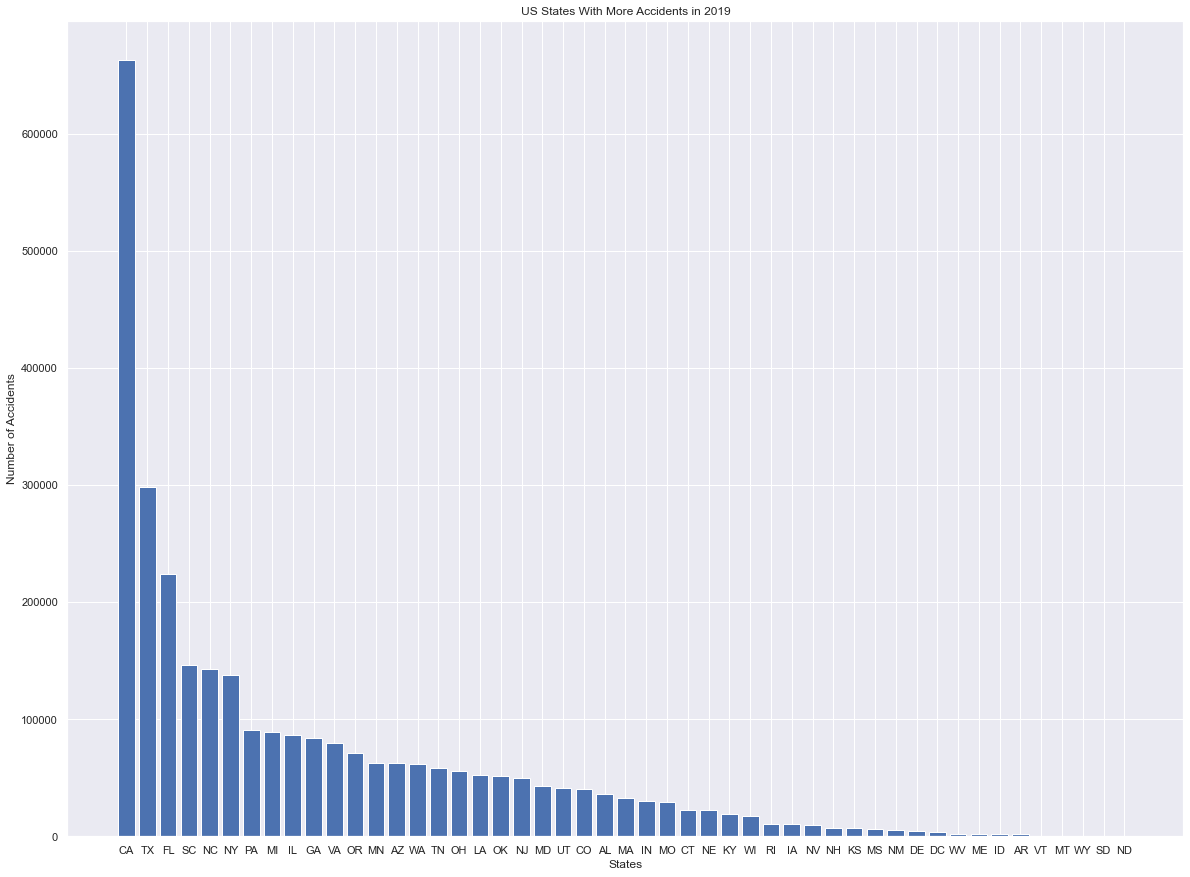

In [100]:
##SEE THE STATES THAT HAS THE MOST ACCIDENTS
#OPTION  - MATPLOTLIB

#Install matplotliv
#pip install matplotlib

import matplotlib.pyplot as plt
%matplotlib inline
#import pandas as pd

#make data:

df_size = df.groupby(['State']).size().reset_index()
df_size.columns=['State', 'Number']

#Order by number of accidents
df_order_size = df_size.sort_values('Number', ascending = False)
df_order_size

y = df_order_size['Number']

x = df_order_size['State']

#make the bar
fig, ax = plt.subplots(figsize=(20,15))
ax.bar(x, y)
ax.set_title('US States With More Accidents in 2019')
ax.set_xlabel('States')
ax.set_ylabel('Number of Accidents')
#Show the bar
plt.show()

#Save the bar
#fig.savefig('Figura2.png', format='png', dpi=fig.dpi)


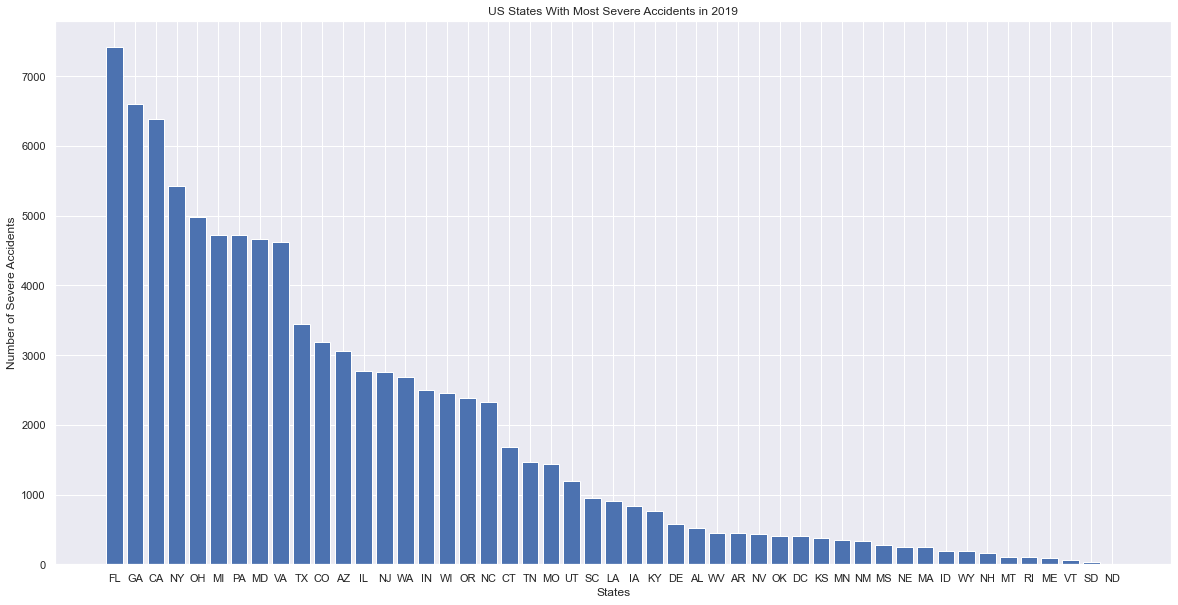

In [46]:
#States that have the most number of most severe accidents - Severity 4 

#make the data 
df_s = df[df['Severity']==4]
df_severe = df_s[['State', 'Severity']].value_counts().reset_index()
df_severe.columns = ['State', 'Severity', 'Count']


y = df_severe['Count']

x = df_severe['State']

#make the figure 
fig, ax = plt.subplots(figsize=(20,10))
ax.bar(x, y)
ax.set_title('US States With Most Severe Accidents in 2019')
ax.set_xlabel('States')
ax.set_ylabel('Number of Severe Accidents')
plt.show()



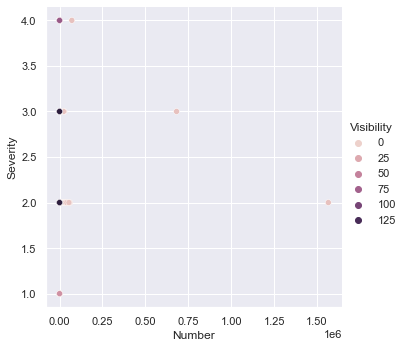

In [23]:
#import seaborn as sns

#WEATHER CONDITIONS

#Count number of accidents by type of severity and weather condition
visibility = df.groupby(['Visibility(mi)', 'Severity'])['Visibility(mi)'].count()
list_visibility = visibility.tolist()
tupple_visibility = visibility.index.tolist()

#Create a new Dataframe with three needed values 
df_visibility = pd.DataFrame(tupple_visibility, columns = ['Visibility', 'Severity'])
visibility = df_visibility['Visibility']
severity = df_visibility['Severity']
number = list_visibility

df_new = pd.DataFrame(list(zip(visibility, severity, number)), columns= ['Visibility', 'Severity', 'Number'])

#Update Theme 
sns.set_theme()

#Data
tips = df_new

#Create Seaborn
sns.relplot(
    data=tips,
    x="Number", y="Severity",
    hue="Visibility",
)


#The most severe accidents occur when visibility is lower.


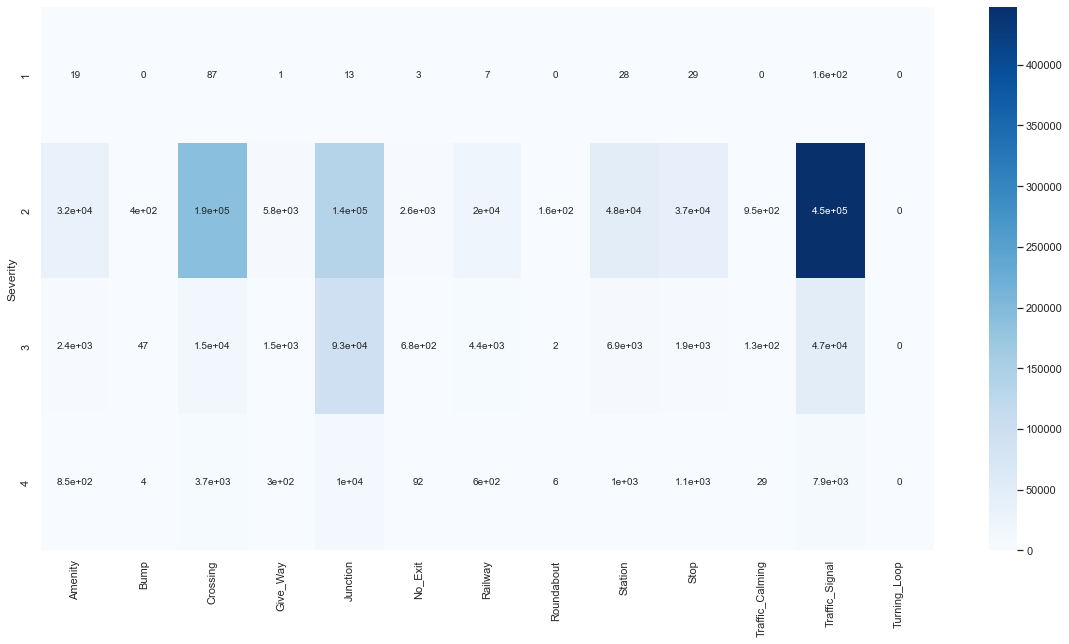

In [61]:
#importing all the libraries
import numpy as np
#import matplotlib.pyplot as plt
#import seaborn as sns

#DATAFRAME Severity by different locations

df_new = pd.pivot_table(df, index=['Severity'], values=['Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop'], 
        aggfunc={'Amenity': np.sum , 'Bump': np.sum , 'Crossing': np.sum , 'Give_Way': np.sum, 
        'Junction': np.sum , 'No_Exit': np.sum , 'Railway' : np.sum, 'Roundabout': np.sum , 'Station': np.sum,
       'Stop': np.sum, 'Traffic_Calming': np.sum, 'Traffic_Signal': np.sum, 'Turning_Loop': np.sum })



#Applying some customization to the heat map
plt.figure(figsize=(20,10))
sns.heatmap(df_new, cmap = "Blues", annot=True)
plt.show()

 
# -> Approximately 10,000 accidents with severity 4 occur at junctions. It follows with approximately 7,900 accidents, in traffic signal.
# -> The largest number of accidents occur with severity 2, located at traffic signals, around 450,000 accidents.
# -> The second highest number of accidents also with severity 2, occur at crossing, about 190,000 accidents.

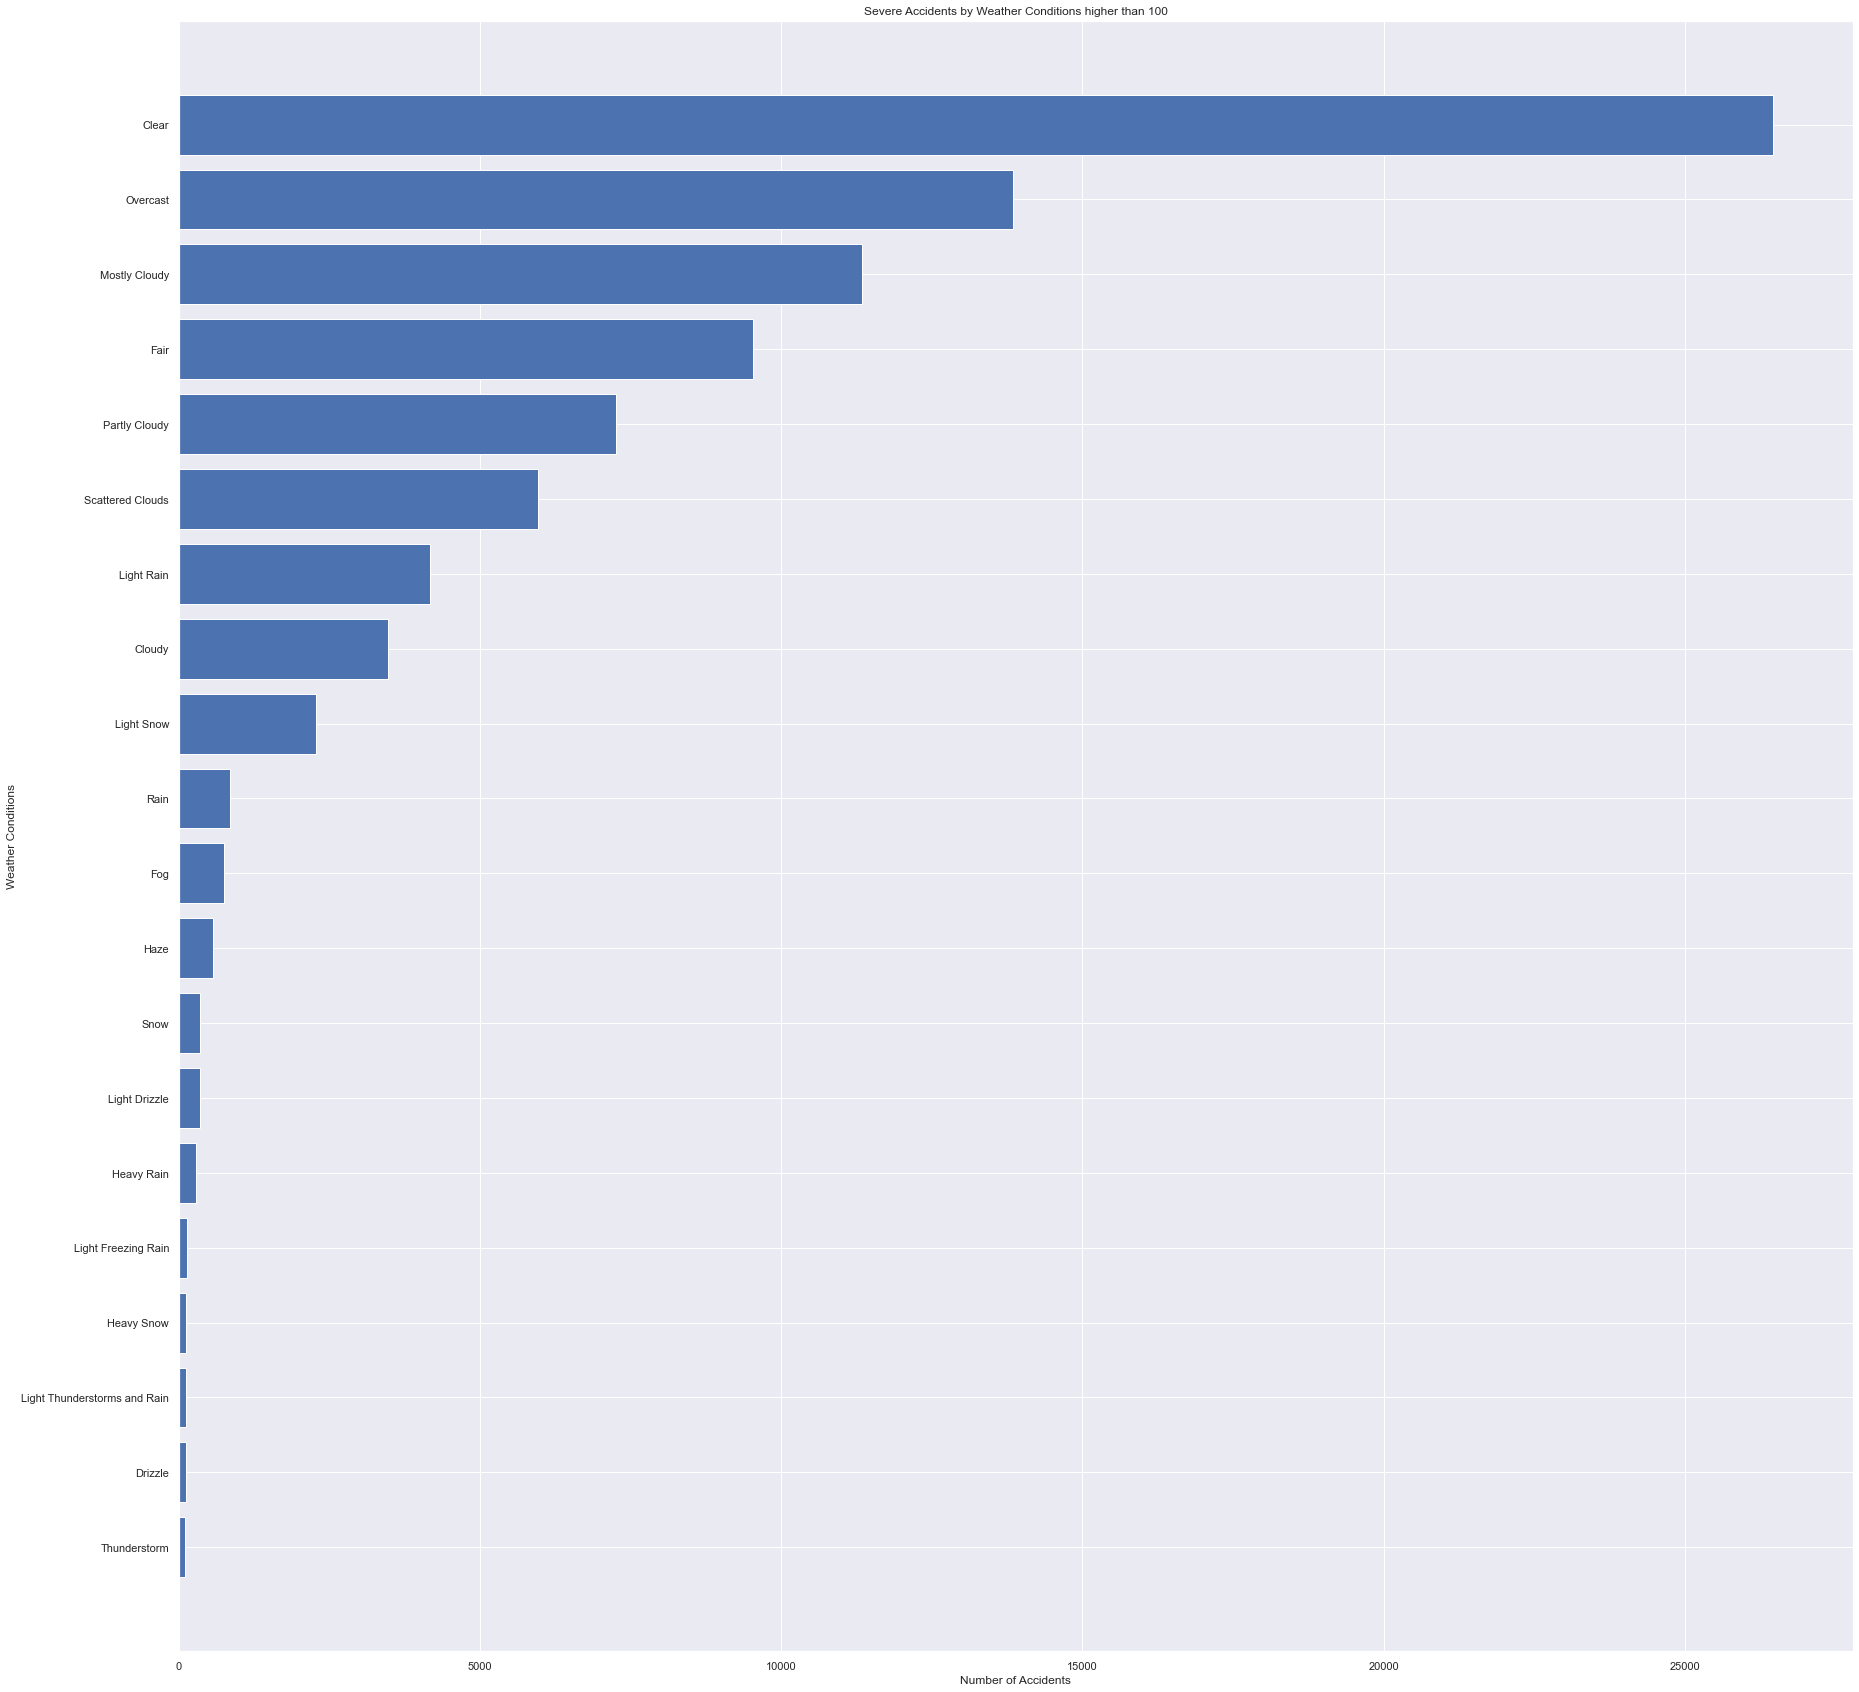

In [96]:
#SEVERE ACCIDENTS BY WEATHER CONDITIONS

import matplotlib.pyplot as plt
import pandas as pd 

#Make the data 

df_s = df[df['Severity']==4]

weather = df_s.groupby(['Weather_Condition'])['Weather_Condition'].count()
order_weather = weather.sort_values(ascending = True)
filter_weather = order_weather.loc[order_weather>100]
list_weather = filter_weather.tolist()
type_weather = filter_weather.index.tolist()

y = list_weather
x = type_weather

#Show the visualization

fig, ax = plt.subplots(figsize=(30,30))
ax.barh(x, y)
ax.set_title('Severe Accidents by Weather Conditions higher than 100')
ax.set_xlabel('Number of Accidents')
ax.set_ylabel('Weather Conditions')
plt.show()

# ->  The most severe accidents (4) occur when weather condition is clear. 